# How to use the R package `arulesViz` from Python using `arulespy`

This document is also avaialble as a IPython notebook: https://github.com/mhahsler/arulespy/blob/main/examples/arulesViz.ipynb

The following may be necessary on Windows to set the 'R_HOME' for `rpy2` correctly:

In [1]:
# from rpy2 import situation
# import os
#
# os.environ['R_HOME'] = situation.r_home_from_registry()
# situation.get_r_home()

## Import Data and Mine Rules

Import the `arules` module from package `arulespy`.

In [2]:
from arulespy.arules import Transactions, apriori, parameters
from arulespy.arulesViz import plot, inspectDT

We read [Zoo.cvs](Zoo.cvs) which contains the description of 101 animals containing nominal variables and one quantitative variable as a pandas dataframe.

In [3]:
import pandas as pd

df = pd.read_csv('Zoo.csv')
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,True,False,False,True,False,False,False,True,True,True,False,False,2,True,False,True,mammal
97,True,False,True,False,True,False,False,False,False,True,True,False,6,False,False,False,insect
98,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
99,False,False,True,False,False,False,False,False,False,True,False,False,0,False,False,False,mollusc.et.al


Convert the pandas dataframe into a sparse transactions object.

In [4]:
trans = Transactions.from_df(df)

trans.as_df()


,items,transactionID
1,"{hair,milk,predator,toothed,backbone,breathes,...",0
2,"{hair,milk,toothed,backbone,breathes,legs=[4,8...",1
3,"{eggs,aquatic,predator,toothed,backbone,fins,l...",2
4,"{hair,milk,predator,toothed,backbone,breathes,...",3
5,"{hair,milk,predator,toothed,backbone,breathes,...",4
...,...,...
97,"{hair,milk,toothed,backbone,breathes,legs=[2,4...",96
98,"{hair,eggs,airborne,breathes,venomous,legs=[4,...",97
99,"{hair,milk,predator,toothed,backbone,breathes,...",98
100,"{eggs,breathes,legs=[0,2),type=mollusc.et.al}",99


In [5]:
rules = apriori(trans,
                    parameter = parameters({"supp": 0.1, "conf": 0.8}), 
                    control = parameters({"verbose": False}))  

rules.as_df().round(2)

,LHS,RHS,support,confidence,coverage,lift,count
1,{},{backbone},0.82,0.82,1.00,1.00,83
2,{type=fish},{fins},0.13,1.00,0.13,5.94,13
3,{type=fish},"{legs=[0,2)}",0.13,1.00,0.13,4.39,13
4,{type=fish},{aquatic},0.13,1.00,0.13,2.81,13
5,{type=fish},{eggs},0.13,1.00,0.13,1.71,13
...,...,...,...,...,...,...,...
5896,"{hair,milk,predator,toothed,backbone,breathes,...",{catsize},0.12,0.86,0.14,1.97,12
5897,"{hair,milk,predator,toothed,backbone,breathes,...","{legs=[4,8]}",0.12,0.92,0.13,1.83,12
5898,"{milk,predator,toothed,backbone,breathes,legs=...",{hair},0.12,1.00,0.12,2.35,12
5899,"{hair,milk,predator,toothed,backbone,breathes,...",{type=mammal},0.12,1.00,0.12,2.46,12


## arulesViz with ggplot

`arulesViz` provides `ggplot` as an drawing engine. `arulesViz.plot()` returns the `ggplot` object which can be
included in the notebook using `image_png()`. 

In [6]:
import rpy2.robjects.lib.ggplot2 as gp
from rpy2.ipython.ggplot import image_png

/home/hahsler/.virtualenvs/r-reticulate/lib/python3.10/site-packages/rpy2/robjects/lib/ggplot2.py:70: UserWarning: This was designed againt ggplot2 versions starting with 3.3. but you have 3.4.2
  warnings.warn(


R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



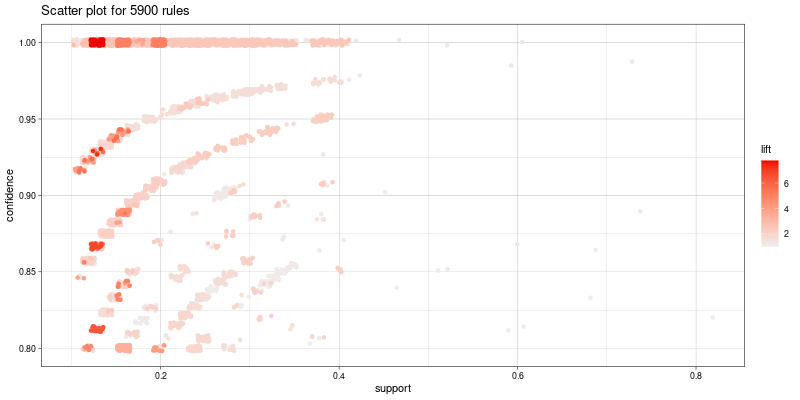

In [7]:

gg = plot(rules, method="scatter")
image_png(gg)

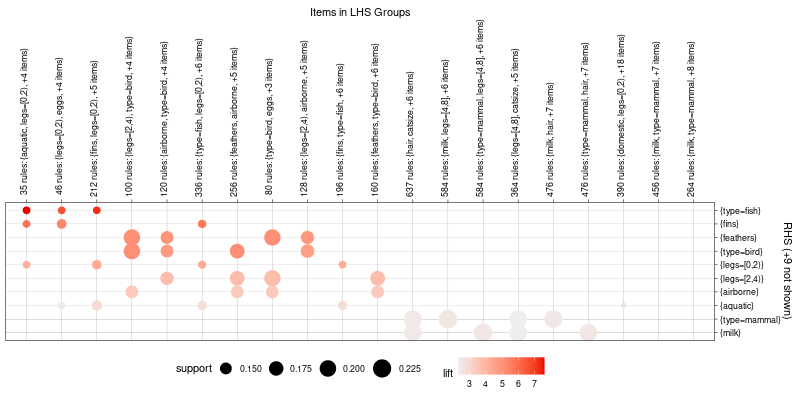

In [8]:
gg = plot(rules, method="grouped")
image_png(gg)

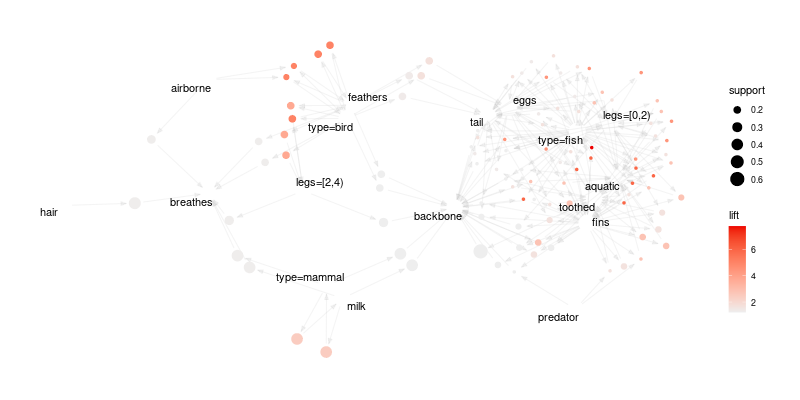

In [9]:
rules_20 = rules.sort(by = 'confidence')[0:100]
gg = plot(rules_20, method="graph")
image_png(gg)

## Interactive Rules Table with HTML Widget

`arulesViz` can create interactive HTML widgets which can easily be integrated into a 
python notebook by saving the widget as a HTML fiel and including it using a IFrame.

In [10]:
from IPython.display import IFrame

import rpy2.robjects.packages as packages
htmlwidgets = packages.importr('htmlwidgets')

In [11]:
m = inspectDT(rules)
htmlwidgets.saveWidget(m, 'datatable.html')

IFrame("datatable.html", "100%", 600)

## arulesViz with HTML Widgets

In [12]:
from IPython.display import IFrame
import rpy2.robjects.packages as packages
htmlwidgets = packages.importr('htmlwidgets')

m = plot(rules_20, method="graph", engine="htmlwidget")
htmlwidgets.saveWidget(m, "graph.html", selfcontained = True)
IFrame("graph.html", "100%", 800)


## Interactive RuleExplorer

RuleExplorer only has experimental support at this point. The ruleExplorer opens a Shiny up in the web browser. Shutting down the Shiny app from within a Python notebook seems to be difficult. Uncomment the following line to explore the rules.

In [13]:
from arulespy.arulesViz import ruleExplorer

# ruleExplorer(rules)

An example of a running ruleExplorer can be found [here](https://mhahsler-apps.shinyapps.io/ruleExplorer_demo/).